In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
fil = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
com = pd.read_csv('Company_Data.csv')
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [4]:
com.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
com.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
com[com.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [8]:
com['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [9]:
com['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [13]:
com['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [14]:
cc = com.copy()

In [15]:
def split(num):
  if num < 5:
    return 'Low'
  elif num >=5 and num < 10:
    return 'Medium'
  else:
    return 'High'

In [16]:
cc['Sales'] = cc['Sales'].apply(split)

In [17]:
cc

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [19]:
cc['Sales'].value_counts()

Medium    244
High       79
Low        77
Name: Sales, dtype: int64

# Visualization

<ipython-input-20-6873c5ff5903>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(com[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


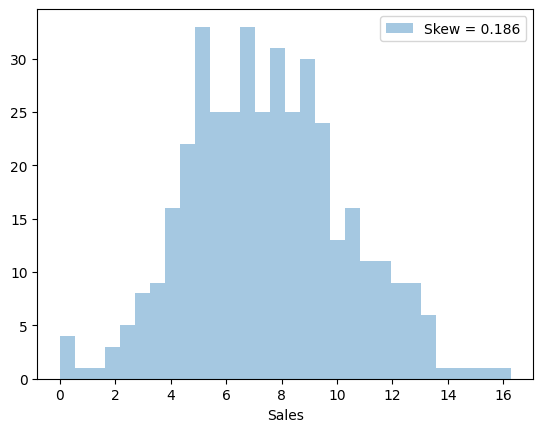

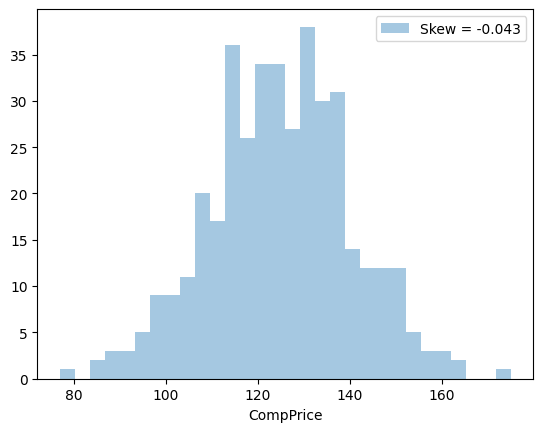

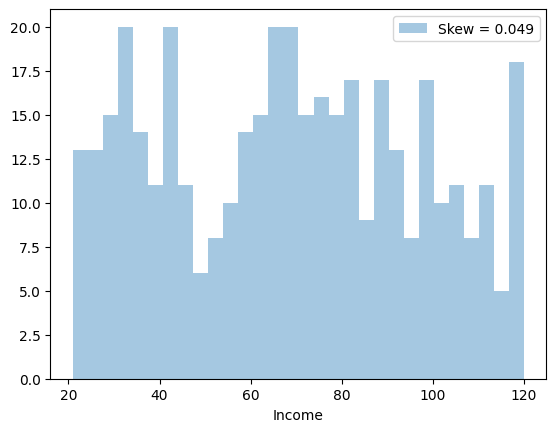

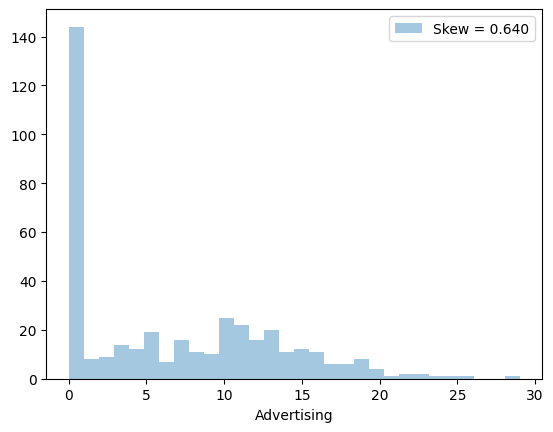

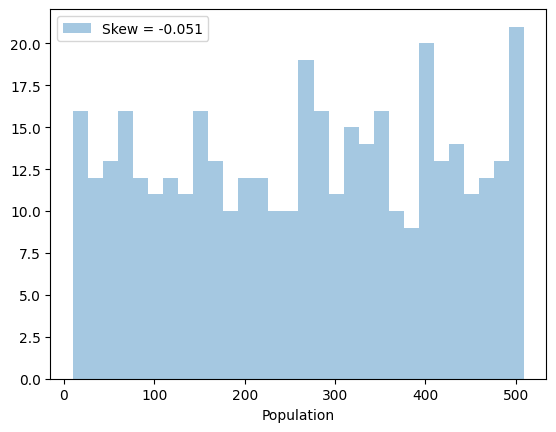

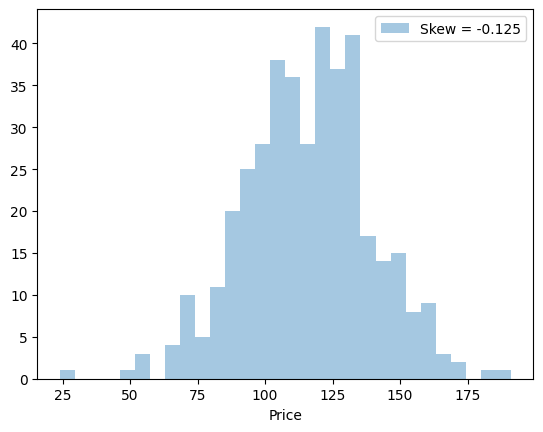

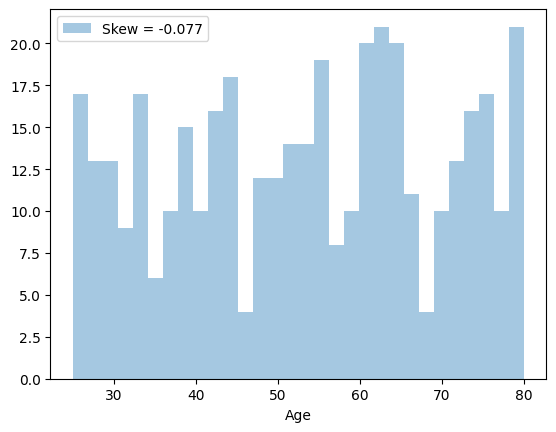

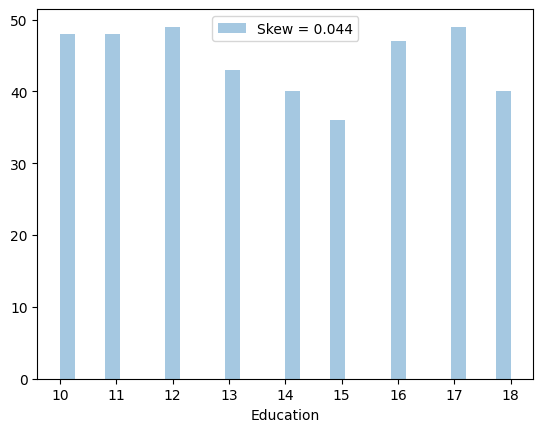

In [20]:
numerical_features=[feature for feature in com.columns if com[feature].dtypes != 'O']
for feat in numerical_features:
    skew = com[feat].skew()
    sns.distplot(com[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

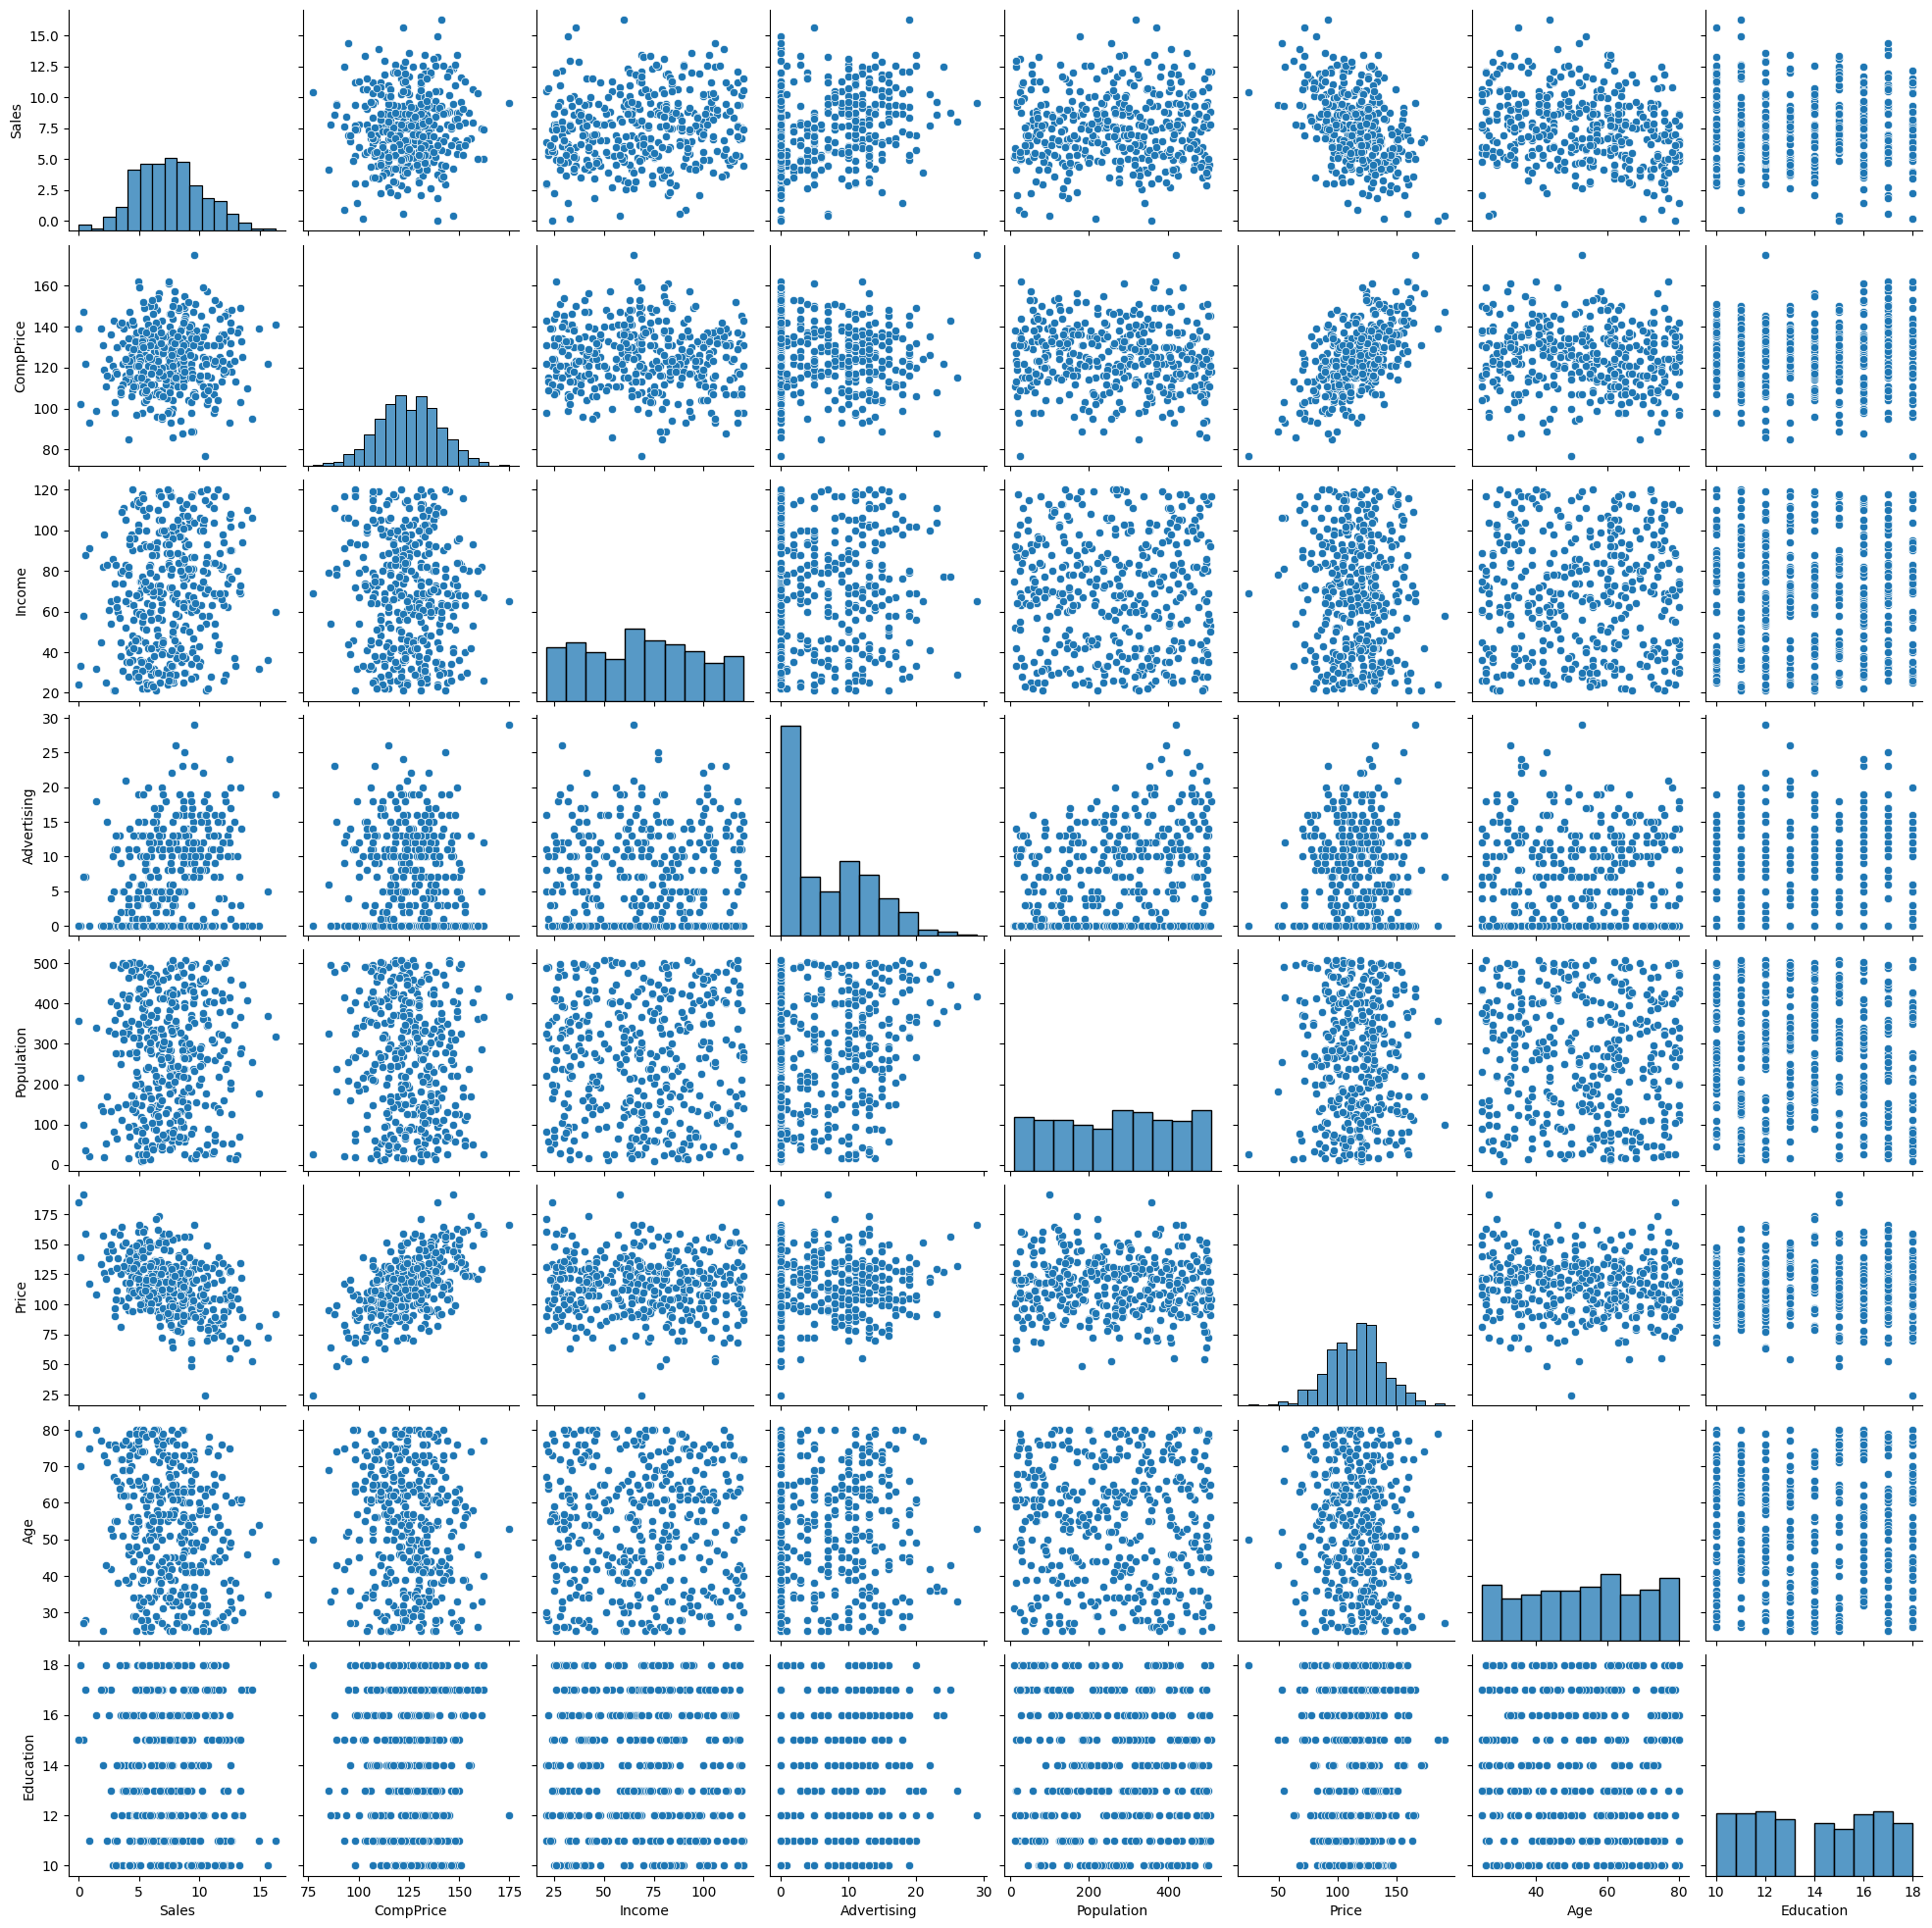

In [21]:
sns.pairplot(data=com)

<ipython-input-23-107e934e5012>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(com.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')


<Axes: >

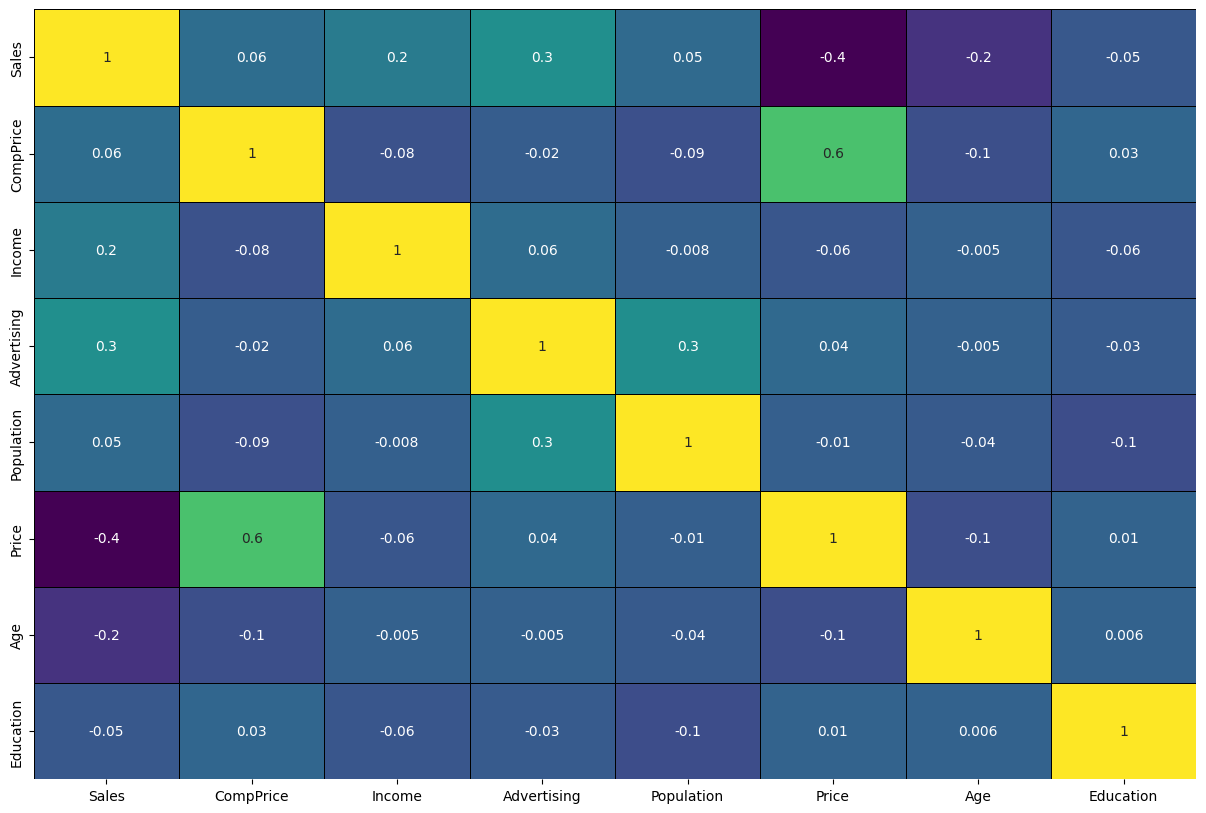

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(com.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

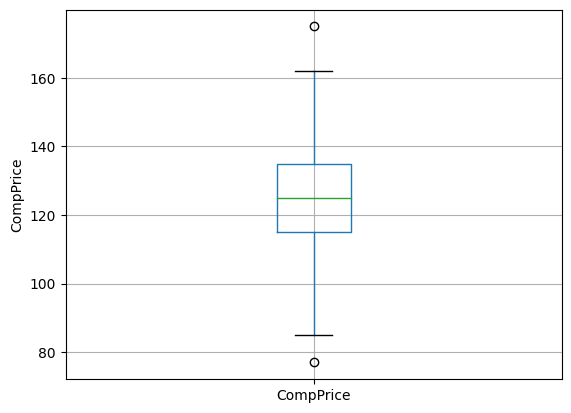

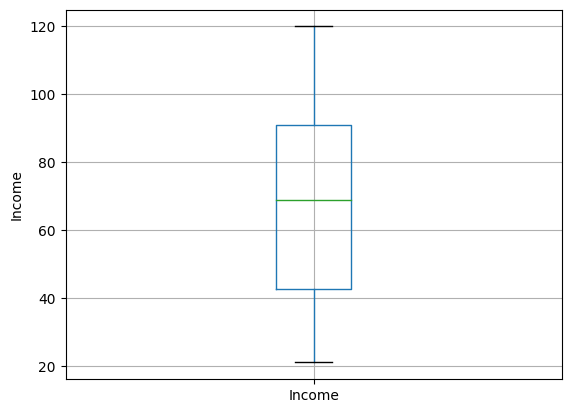

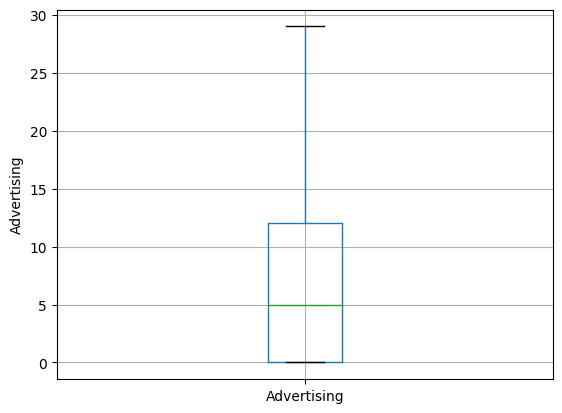

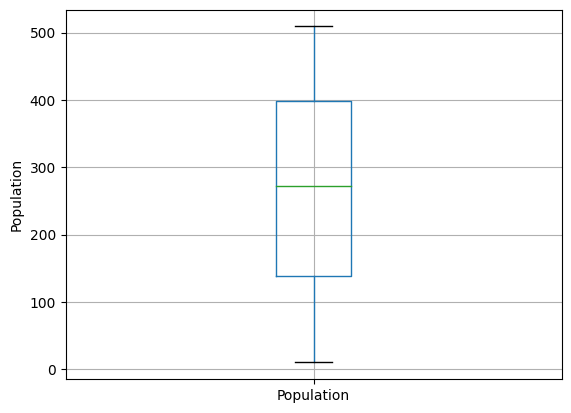

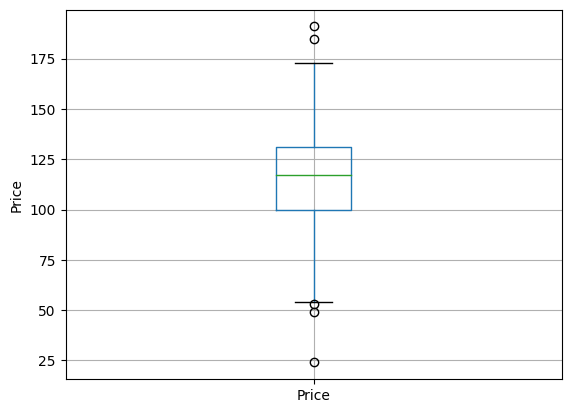

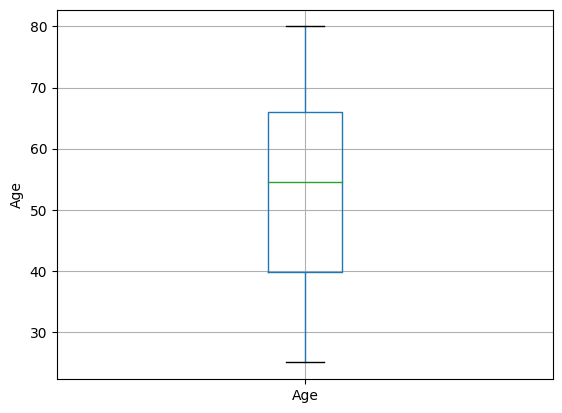

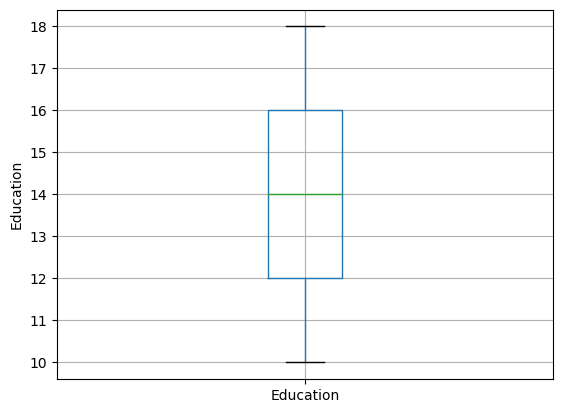

In [28]:
cc_num = pd.concat([cc.iloc[:, 1:6], cc.iloc[:, [7, 8]]], axis = 'columns')
for feature in cc_num:
    cc_num = cc_num.copy()
    cc_num.boxplot(column = feature)
    plt.ylabel(feature)
    plt.show()

In [29]:
cc_num.corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


Treating outl

In [32]:
q1 = cc['CompPrice'].quantile(0.25)
q3 = cc['CompPrice'].quantile(0.75)
IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
cc[(cc['CompPrice'] > upper_bound) | (cc['CompPrice'] < lower_bound)]

cc = cc[(com['CompPrice'] < upper_bound) & (cc['CompPrice'] > lower_bound)]
cc = cc.copy()
cc.loc[(cc['CompPrice'] > upper_bound), 'CompPrice'] = upper_bound
cc.loc[(cc['CompPrice'] < lower_bound), 'CompPrice'] = lower_bound

<Axes: ylabel='CompPrice'>

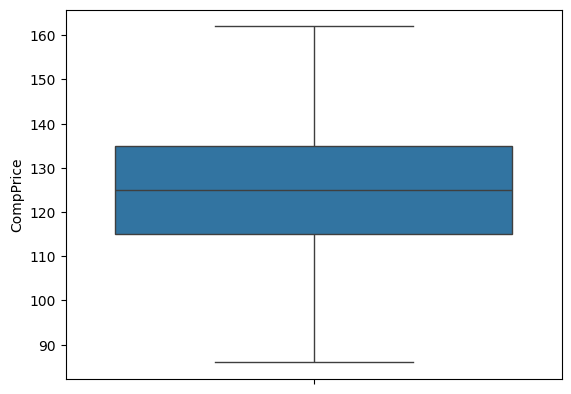

In [34]:
sns.boxplot(cc['CompPrice'])

<Axes: ylabel='Price'>

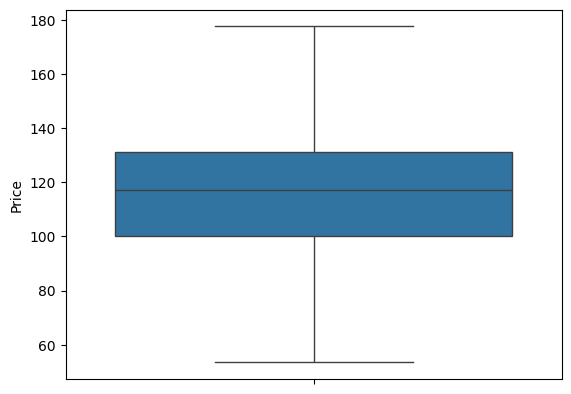

In [36]:
q1 = cc['Price'].quantile(0.25)
q3 = cc['Price'].quantile(0.75)
IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
cc[(cc['Price'] > upper_bound) | (cc['Price'] < lower_bound)]

cc_num = cc[(cc['Price'] < upper_bound) & (cc['Price'] > lower_bound)]
cc_num = cc.copy()
cc_num.loc[(cc_num['Price'] > upper_bound), 'Price'] = upper_bound
cc_num.loc[(cc_num['Price'] < lower_bound), 'Price'] = lower_bound
sns.boxplot(cc_num['Price'])

In [37]:
cc_num.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120.0,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83.0,Good,65,10,Yes,Yes
2,High,113,35,10,269,80.0,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97.0,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128.0,Bad,38,13,Yes,No


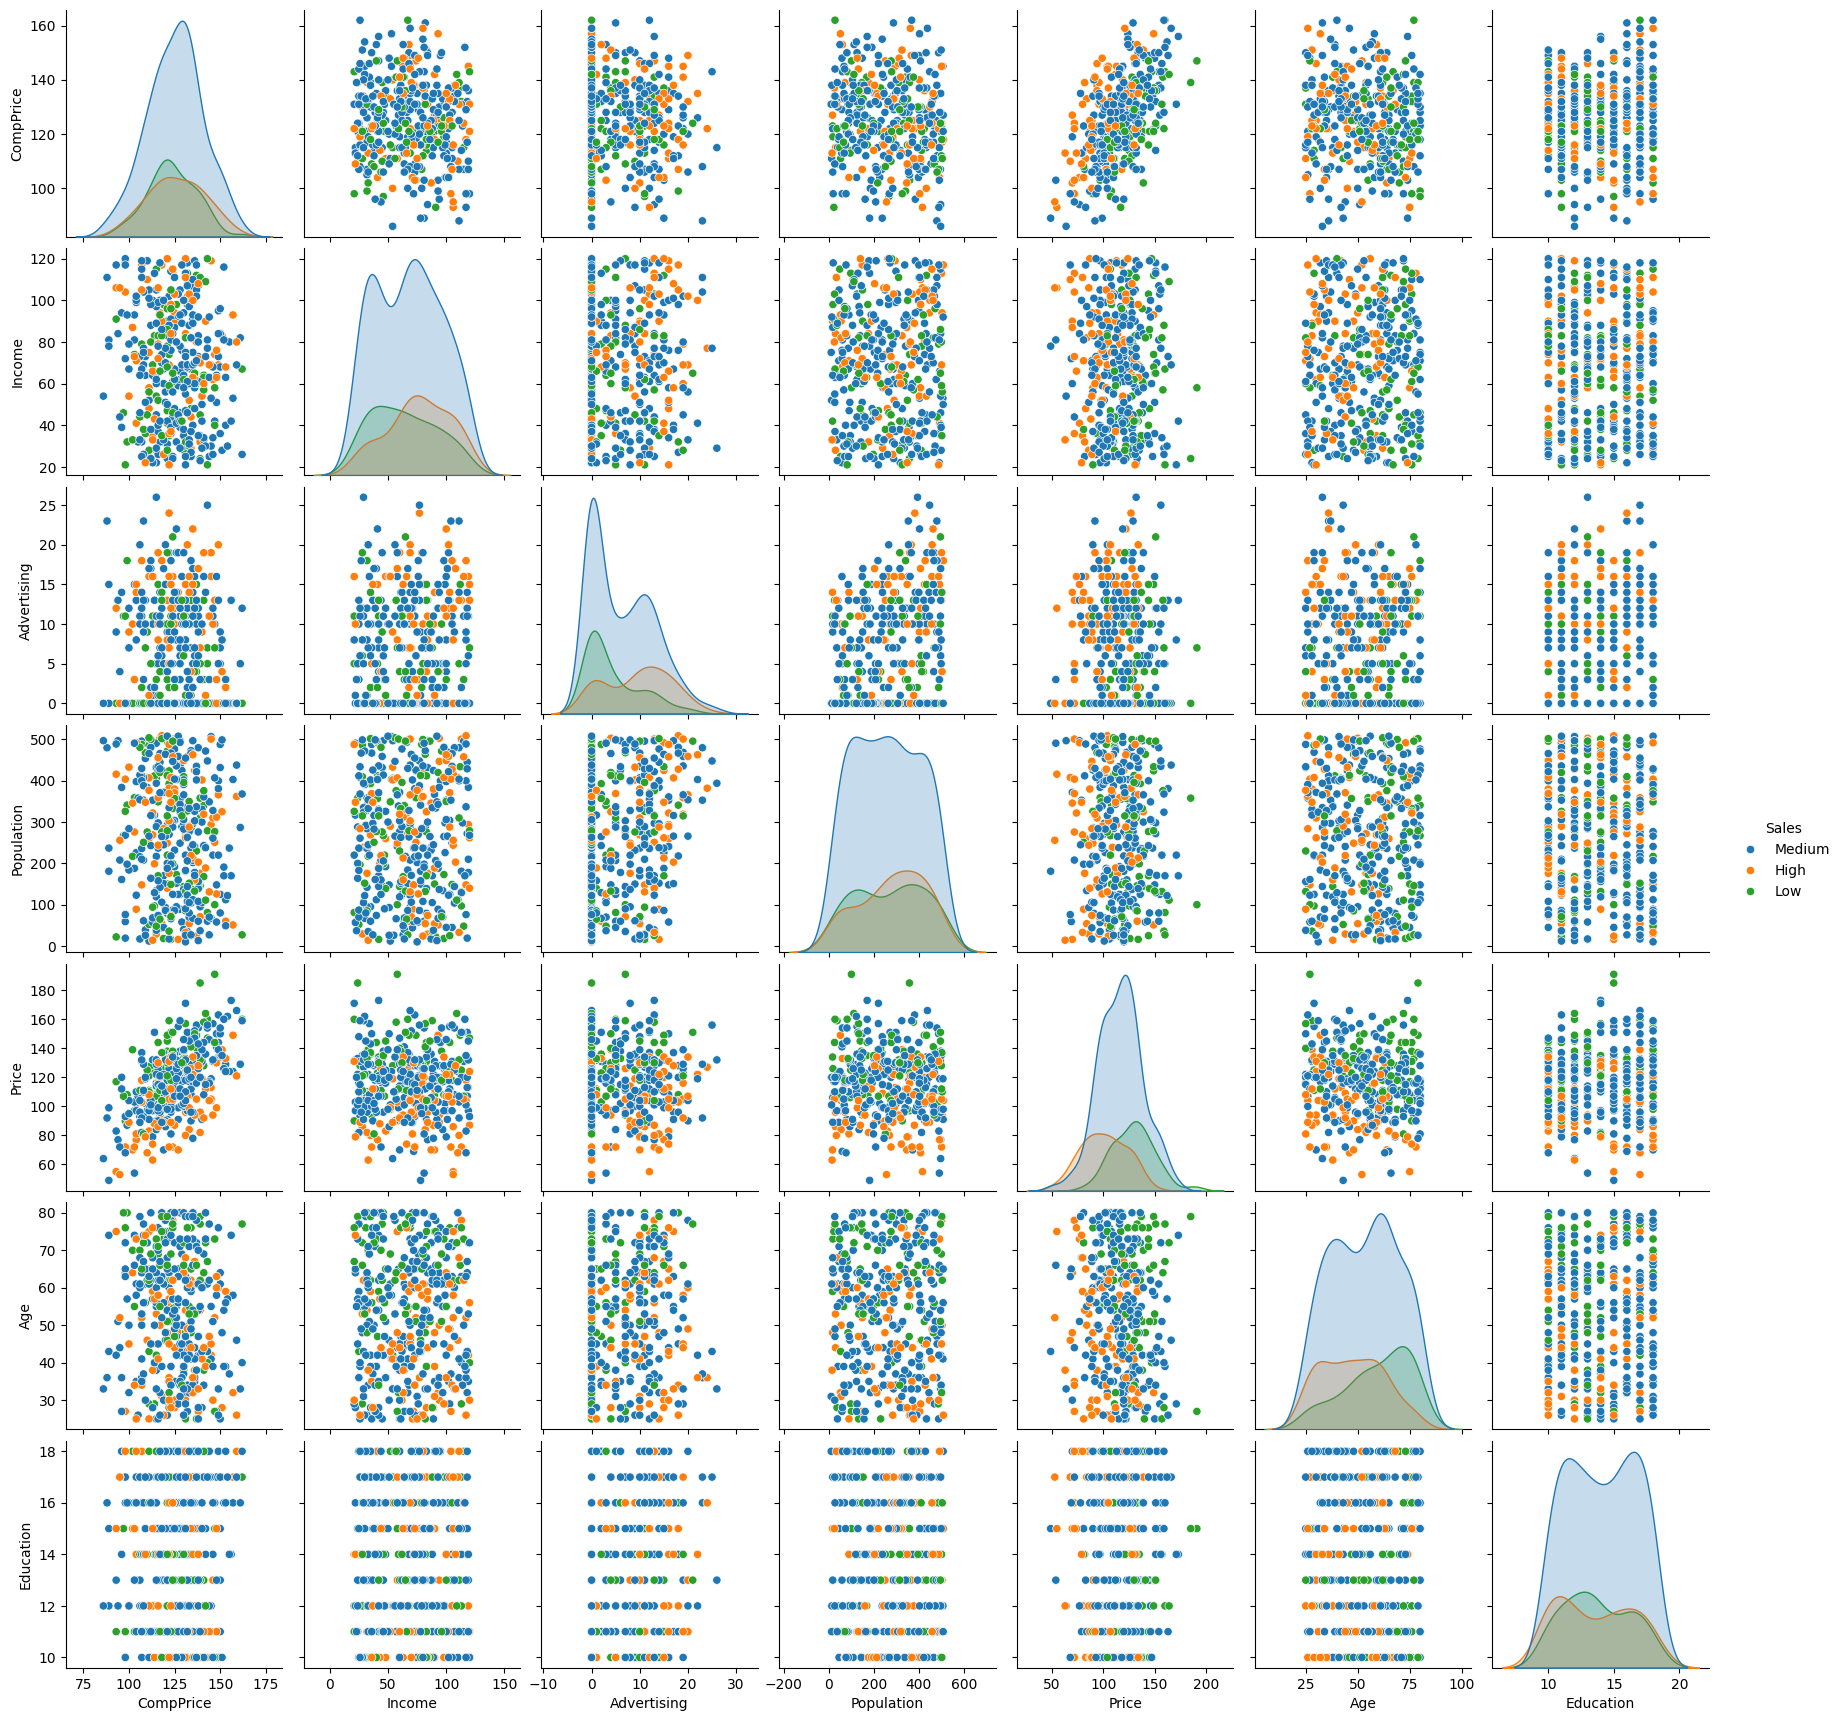

In [39]:
sns.pairplot(data=cc, hue = 'Sales')

In [40]:
cc_num = pd.get_dummies(cc_num.iloc[:,1:])

In [41]:
cc_num['Sales'] = cc['Sales']
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
cc_num['Sales'] = l.fit_transform(cc_num['Sales'])
cc_num.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120.0,42,17,1,0,0,0,1,0,1,2
1,111,48,16,260,83.0,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80.0,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97.0,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128.0,38,13,1,0,0,0,1,1,0,1


In [42]:
cc_num.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120.0,42,17,1,0,0,0,1,0,1,2
1,111,48,16,260,83.0,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80.0,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97.0,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128.0,38,13,1,0,0,0,1,1,0,1


# Decision Tree

In [43]:
x = cc_num.iloc[:,:-1]
y=cc_num.Sales

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

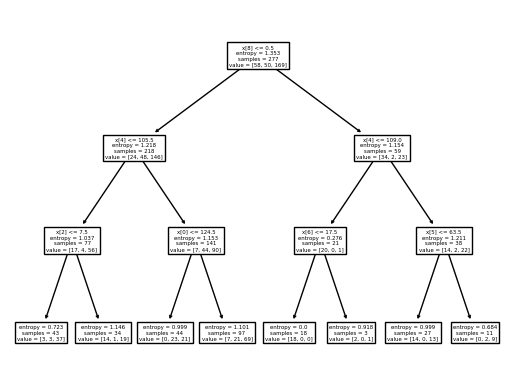

In [47]:
from sklearn import tree
tree.plot_tree(model);

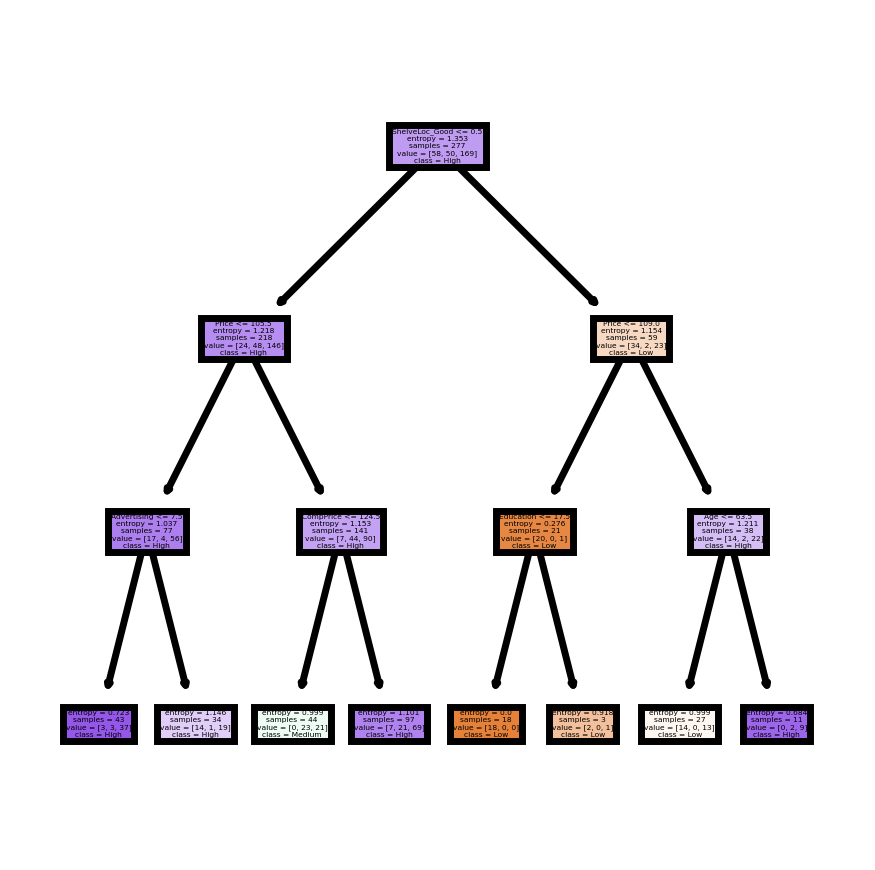

In [48]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']
cn = ['Low','Medium','High']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (2,2), dpi = 500)
tree.plot_tree(model, feature_names= fn, class_names = cn, filled = True);

In [49]:
pred = model.predict(X_test)
pred

array([2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2,
       2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 1, 2, 1, 2, 2, 2, 2, 2])

In [50]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, pred)
con_mat

array([[12,  0,  8],
       [ 0, 15, 11],
       [11, 15, 48]])

In [52]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
acc

0.625

# Validation

kfold

In [57]:
X = cc_num.iloc[:,:-1]
y = cc_num.Sales

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10)
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

result1 = cross_val_score(model1, X, y, cv=kfold)
result1.mean()

0.64

LooCV

In [58]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()

model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
result2 = cross_val_score(model2, X, y, cv=loocv)

result2.mean()

0.6423173803526449